<a href="https://colab.research.google.com/github/soongjamm/Machine-Learning-Learning/blob/master/Tensorflow/linear_regression_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.3.0
x_data.shape =  (15, 3) , t_data.shape =  (15,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 36.1372
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 33.7451
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 31.7989
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 30.1105
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 28.5854
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 27.1749
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 25.8532
Epoch 8/1000
1/1 [======================

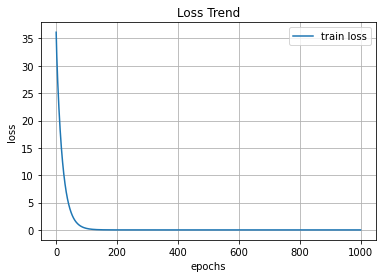

In [12]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

# train data
# t_data = 2*x1 - 3*x2 + 2*x3
x_data = np.array([ [1, 2, 0], [5,4,3], [1,2,-1], [3,1,0], [2,4,2],
                   [4,1,2], [-1,3,2], [4,3,3], [0,2,6], [2,2,1],
                   [1,-2,-2], [0,1,3], [1,1,3], [0,1,4], [2,3,3]         
])
t_data = np.array([-4, 4, -6, 3, -4,
                   9,-7, 5, 6, 0,
                   4, 3, 5, 5, 1])
print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

# [2] 모델 구축
# Linear Regression을 keras 이용하여 생성
model = Sequential()
model.add(Dense(1, input_shape=(3,), activation='linear')) # 노드 3개인 출력층 생성 - 입력데이터가 3개로 이루어져 있으므로.

# [3] 모델 컴파일
model.compile(optimizer=SGD(learning_rate = 1e-2), loss='mse') # optimizer = 학습 알고리즘, loss = 손실함수, learning_rate = 학습률
model.summary() # 전체 구조와 쉐입, 학습할 파라미터 확인

# [4] 모델 학습
hist = model.fit(x_data, t_data, epochs=1000)

# [5] 모델 평가 및 예측
test_data = [ [5,5,0], [2,3,1], [-1,0,-1], [10,5,2], [4, -1, -2]]
ret_val = [2*data[0] -3*data[1] + 2*data[2] for data in test_data]
prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('================')
print(ret_val)

# 모델 손실함수 추세 그래프
import matplotlib.pyplot as plt
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

# 측정지표 metrics=['loss'] 항목은 기본으로 지정되어 hist, history['loss']에 저장 됌
plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()
